# Sesión 02: Estructuras de datos
Dificultad 😀😀😀😀 (fácil)  
Uso de código: 🐍🐍 (poco)

## 2.1 Carga de los datos

Como primer paso debemos indicar qué biblioteca vamos a emplear para importar los datos. En este caso utilizaremos *pandas* con el alias *pd*. El nombre de pandas proviene de *panel data*. 

In [1]:
import pandas as pd

Luego, utilizaremos una función para leer el archivo en la cual agregaremos como argumentos la ubicación del archivo (*path*) y el nombre del archivo:

In [2]:
df = pd.read_excel('data/bd01_casas.xlsx')

Siempre se debe indicar la ubicación del archivo, a menos que el archivo esté en el mismo directorio del Jupyter notebook. Adicionalmente, se pueden incluir algunas instrucciones mediante otros argumentos.

Los formatos más comunes son *csv* (comma separated value) y excel por lo que lo más frecuente es usar *read_excel* y *read_csv*. Dependiendo del tipo de archivo, también están disponibles funciones como *read_json*, *read_sas*, *read_stata*, *read_sql* y al menos una docena más. Por ejemplo, ve a la siguiente liga y copia la tabla con las empresas incluidas en el IPC de la BMV: https://finance.yahoo.com/quote/%5EMXX/components/ y ejecuta la siguiente instrucción:

In [3]:
# Este comando se usa cuando copiamos datos de Excel, el comando pega lo que tenemos en clipboard
# ipc = pd.read_clipboard()
# ipc

### Dataframes

Una forma muy común de organizar los datos es en filas y columnas. Cada fila corresponde a una observación (elemento, objeto, caso, individuo, evento), y cada columna corresponde a una variable (en machine learning las variables se les conoce como *features*). En Pandas, a este tipo de ordenamiento se le conoce como DataFrame y la función que utilizamos importa los datos en un dataframe.

In [4]:
df

,operacion,tipo,municipio,colonia,preciomillones,recamaras,baños,construccion
0,Venta,1,San Pedro Garza García,Colonia Del Valle,4.20,3,2.0,130
1,Venta,0,San Pedro Garza García,Colonia Del Valle,5.10,3,5.0,280
2,Venta,1,San Pedro Garza García,Colonia Del Valle,5.50,2,2.0,112
3,Venta,1,San Pedro Garza García,Colonia Del Valle,5.70,2,2.0,112
4,Venta,1,San Pedro Garza García,Colonia Del Valle,5.80,2,2.0,112
...,...,...,...,...,...,...,...,...
150,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,5.0,950
151,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,4.0,950
152,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,5.0,960
153,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,4.0,960


Observa que una característica adicional es que cuentan con un índice para las filas. En principio, este índice es secuencial empezando por cero, pero puede ser sustituido por un ID, una fecha o cualquier otra variable. Un dataframe puede incluso tener varios índices para representar objetos multidimensionales (cubos de datos).

Para seleccionar solamente una columna utiliza corchetes o notación con punto, por ejemplo df['recamaras'] o df.recamaras. Al seleccionar una sola columna esta se mostrará como una serie.

In [5]:
df['recamaras']

0      3
1      3
2      2
3      2
4      2
      ..
150    3
151    3
152    4
153    4
154    4
Name: recamaras, Length: 155, dtype: int64

Para seleccionar múltiples columnas, agrega las columnas en una lista:

In [6]:
df[['recamaras', 'baños']]

,recamaras,baños
0,3,2.0
1,3,5.0
2,2,2.0
3,2,2.0
4,2,2.0
...,...,...
150,3,5.0
151,3,4.0
152,4,5.0
153,4,4.0


Es posible hacer operaciones con columnas. Por ejemplo

In [7]:
df['preciom2'] = (df['preciomillones'] / df['construccion']) * 1000000
df

,operacion,tipo,municipio,colonia,preciomillones,recamaras,baños,construccion,preciom2
0,Venta,1,San Pedro Garza García,Colonia Del Valle,4.20,3,2.0,130,32307.692308
1,Venta,0,San Pedro Garza García,Colonia Del Valle,5.10,3,5.0,280,18214.285714
2,Venta,1,San Pedro Garza García,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,Colonia Del Valle,5.80,2,2.0,112,51785.714286
...,...,...,...,...,...,...,...,...,...
150,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,5.0,950,49473.684211
151,Venta,0,San Pedro Garza García,Colonia Del Valle,47.00,3,4.0,950,49473.684211
152,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,5.0,960,51041.666667
153,Venta,0,San Pedro Garza García,Colonia Del Valle,49.00,4,4.0,960,51041.666667


## 2.2 Revisión de los datos

### Revisa los primeros renglones

Siempre es útil revisar los primeros renglones del dataframe para verificar que los datos estén en el formato apropiado. Para ello, vamos a utilizar el método *head( )*. 

Un método es una función asociada a un dataframe y se utiliza un punto para indicar esta asociación, por ejemplo *df.head()*. 

Un método tiene parámetros que van entre paréntesis. En el caso de *.head()* podemos agregar el número de renglones que deseamos visualizar. De manera predeterminada este número es de 5 renglones


In [8]:
df.head(5)

,operacion,tipo,municipio,colonia,preciomillones,recamaras,baños,construccion,preciom2
0,Venta,1,San Pedro Garza García,Colonia Del Valle,4.2,3,2.0,130,32307.692308
1,Venta,0,San Pedro Garza García,Colonia Del Valle,5.1,3,5.0,280,18214.285714
2,Venta,1,San Pedro Garza García,Colonia Del Valle,5.5,2,2.0,112,49107.142857
3,Venta,1,San Pedro Garza García,Colonia Del Valle,5.7,2,2.0,112,50892.857143
4,Venta,1,San Pedro Garza García,Colonia Del Valle,5.8,2,2.0,112,51785.714286


Una alternativa es revisar los últimos cinco valores con *tail()*. 

In [ ]:
# Práctica: encuentra los últimos 3 valores del dataframe ipc


### Revisa la forma de tu dataframe

Cada dataframe tiene un *atributo* (una característica automática) de forma (*shape*). Esta forma tiene dos dimensiones: número de renglones y número de columnas. Estos dos valores se acomodan en una *tupla* (una lista que no puede ser modificada). Para desplegar este atributo utilizamos: 

In [9]:
df.shape

(155, 9)

Nótese que *shape* no requiere argumentos y por tanto no se añaden paréntesis. Esa es la diferencia entre un *atributo* y un *método*.

### Revisa los nombres de las columnas
Los nombres de las columnas corresponden a los nombres de las variables y son otro atributo de los dataframes. Puedes consultar estos nombres utilizando:

In [10]:
df.columns

Index(['operacion', 'tipo', 'municipio', 'colonia', 'preciomillones',
       'recamaras', 'baños', 'construccion', 'preciom2'],
      dtype='object')

En caso de desear renombrar una columna se puede utilizar *df.rename(columns={'nombre_anterior': 'nombre_nuevo'})*

In [11]:
df = df.rename(columns={'baños':'banos'})
df.columns

Index(['operacion', 'tipo', 'municipio', 'colonia', 'preciomillones',
       'recamaras', 'banos', 'construccion', 'preciom2'],
      dtype='object')

Si deseas borrar una columna puedes utilizar *df.drop(columns=['nombre_columna']*). 

In [12]:
df = df.drop(columns=['municipio'])
df

,operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
0,Venta,1,Colonia Del Valle,4.20,3,2.0,130,32307.692308
1,Venta,0,Colonia Del Valle,5.10,3,5.0,280,18214.285714
2,Venta,1,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,Colonia Del Valle,5.80,2,2.0,112,51785.714286
...,...,...,...,...,...,...,...,...
150,Venta,0,Colonia Del Valle,47.00,3,5.0,950,49473.684211
151,Venta,0,Colonia Del Valle,47.00,3,4.0,950,49473.684211
152,Venta,0,Colonia Del Valle,49.00,4,5.0,960,51041.666667
153,Venta,0,Colonia Del Valle,49.00,4,4.0,960,51041.666667


### Revisa los datos perdidos
Es importante identificar los datos perdidos en un dataframe. Aunque en algunos casos son omitidos automáticamente, muchos procedimientos requieren que se tenga una matriz completa sin datos perdidos. 

Pandas utiliza el símbolo *NaN* (Not a number) para indicar datos numéricos perdidos (específicamente, datos perdidos de punto flotante). Si son datos de series de tiempo (*datatime*) son indicados como *NaT*.

Una forma rápida de consultar los datos perdidos en un dataframe es mediante el método *info()*. Al utilizarlo se mostrará el nombre de cada columna y el total de registros (*non-null values*)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   operacion       155 non-null    object 
 1   tipo            155 non-null    int64  
 2   colonia         155 non-null    object 
 3   preciomillones  155 non-null    float64
 4   recamaras       155 non-null    int64  
 5   banos           155 non-null    float64
 6   construccion    155 non-null    int64  
 7   preciom2        155 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 9.8+ KB


Para revisar los valores perdidos en una variable puedes usar los métodos *isna()* o *notna()*, que arrojarán *True* o *False* para elemento según corresponda. Puedes contar el número de valores perdidos agregando *sum()* y especificar incluso la variable:

In [14]:
df.recamaras.isnull().sum()

0

In [ ]:
# Práctica: realiza un conteo de valores perdidos en el dataframe ipc


Pandas reconoce automáticamente algunos formatos de valores perdidos como *NA* o *NULL* pero considera que en muchas bases de datos los valores perdidos tienen algún código numérico como 99 o incluso 0.

Para borrar los datos perdidos puedes utilizar *df.dropna()*. Sin embargo, el tratamiento de datos perdidos se verá en una práctica posterior.

### Revisa los tipos de datos

Para identicar qué tipo de dato es cada variable se puede utilizar el método *dtype*

In [15]:
df.dtypes

operacion          object
tipo                int64
colonia            object
preciomillones    float64
recamaras           int64
banos             float64
construccion        int64
preciom2          float64
dtype: object

Puedes cambiar un tipo de dato a otro mediante el método *astype()*. Por ejemplo, si X debe ser *float* se puede usar *df.X.astype(float)*

In [16]:
df['tipo'] = df['tipo'].astype(object)
df.dtypes

operacion          object
tipo               object
colonia            object
preciomillones    float64
recamaras           int64
banos             float64
construccion        int64
preciom2          float64
dtype: object

### Cálculo de estadística descriptiva
Aunque este tema se revisará más adelante, se puede utilizar *df.describe()* para obtener de manera general la estadística descriptiva.

In [17]:
df.describe()

,preciomillones,recamaras,banos,construccion,preciom2
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,19.237677,3.180645,3.735484,455.793548,41508.641384
std,10.476755,0.669085,1.199715,205.409559,8886.797849
min,4.200000,2.000000,2.000000,112.000000,16153.846154
25%,10.520000,3.000000,3.000000,275.000000,36697.704918
50%,18.070000,3.000000,4.000000,475.000000,40833.333333
75%,26.500000,4.000000,5.000000,588.500000,47116.968699
max,49.980000,6.000000,8.000000,1300.000000,72580.645161


## 2.3 Consulta de dataframes
Pandas tiene un método en el cual se introduce una expresión booleana y arroja un subconjunto del dataframe en el cual la expresión booleana es verdadera.

In [18]:
df_subset = df.query("construccion < 150")
df_subset

,operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
0,Venta,1,Colonia Del Valle,4.20,3,2.0,130,32307.692308
2,Venta,1,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,Colonia Del Valle,5.80,2,2.0,112,51785.714286
6,Venta,0,Colonia Del Valle,6.11,2,2.0,135,45259.259259
7,Venta,1,Colonia Del Valle,6.20,2,2.0,129,48062.015504


Las consultas se pueden ser más complejas, por ejemplo

In [19]:
df_subset = df.query("construccion < 150 and recamaras == 2")
df_subset

,operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
2,Venta,1,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,Colonia Del Valle,5.80,2,2.0,112,51785.714286
6,Venta,0,Colonia Del Valle,6.11,2,2.0,135,45259.259259
7,Venta,1,Colonia Del Valle,6.20,2,2.0,129,48062.015504


Otra opción para filtrar con condiciones es escribir la condición dentro de los corchetes

In [20]:
df[df['construccion']<150]

,operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
0,Venta,1,Colonia Del Valle,4.20,3,2.0,130,32307.692308
2,Venta,1,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,Colonia Del Valle,5.80,2,2.0,112,51785.714286
6,Venta,0,Colonia Del Valle,6.11,2,2.0,135,45259.259259
7,Venta,1,Colonia Del Valle,6.20,2,2.0,129,48062.015504


Si son dos condiciones, cada condición va dentro de un paréntesis

In [21]:
df[(df.construccion<150) & (df.recamaras==2)]

,operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
2,Venta,1,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,Colonia Del Valle,5.80,2,2.0,112,51785.714286
6,Venta,0,Colonia Del Valle,6.11,2,2.0,135,45259.259259
7,Venta,1,Colonia Del Valle,6.20,2,2.0,129,48062.015504


Si lo que interesa son los valores más grandes o más pequeños en alguna variable se puede utilizar *nlargest* o *nsmallest* respectivamente

In [22]:
df.nlargest(4, 'recamaras')

,operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
146,Venta,0,Colonia Del Valle,40.00,6,4.0,775,51612.903226
28,Venta,0,Colonia Del Valle,9.60,5,5.0,340,28235.294118
87,Venta,0,Colonia Del Valle,18.99,5,5.0,480,39562.500000
30,Venta,0,Colonia Del Valle,9.72,4,4.0,256,37968.750000


Una selección avanzada de filas y columnas se puede realizar con .loc

## 2.4 Transformaciones básicas

### Agregar estilos al dataframe
Es posible agregar estilos a los dataframes con el método *style*. Por ejemplo, se puede usar *set_caption* para agregar un título al dataframe o *hide* para ocultar el índice.

In [23]:
df_subset.style.set_caption('Muestra de casas').hide()

operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
Venta,1,Colonia Del Valle,5.500000,2,2.000000,112,49107.142857
Venta,1,Colonia Del Valle,5.700000,2,2.000000,112,50892.857143
Venta,1,Colonia Del Valle,5.800000,2,2.000000,112,51785.714286
Venta,0,Colonia Del Valle,6.110000,2,2.000000,135,45259.259259
Venta,1,Colonia Del Valle,6.200000,2,2.000000,129,48062.015504


### Ordenar dataframe
Podemos ordenar un dataframe con base en varias de las variables

In [24]:
df.sort_values(by = ['recamaras', 'banos'], inplace=True)
#df.reset_index(inplace=True)
df

,operacion,tipo,colonia,preciomillones,recamaras,banos,construccion,preciom2
2,Venta,1,Colonia Del Valle,5.50,2,2.0,112,49107.142857
3,Venta,1,Colonia Del Valle,5.70,2,2.0,112,50892.857143
4,Venta,1,Colonia Del Valle,5.80,2,2.0,112,51785.714286
5,Venta,1,Colonia Del Valle,6.00,2,2.0,211,28436.018957
6,Venta,0,Colonia Del Valle,6.11,2,2.0,135,45259.259259
...,...,...,...,...,...,...,...,...
145,Venta,0,Colonia Del Valle,39.50,4,7.0,762,51837.270341
138,Venta,0,Colonia Del Valle,31.60,4,8.0,643,49144.634526
28,Venta,0,Colonia Del Valle,9.60,5,5.0,340,28235.294118
87,Venta,0,Colonia Del Valle,18.99,5,5.0,480,39562.500000


### Agrupado

Puedes agrupar con base en una variable

In [25]:
g = df.groupby('tipo')
# Podemos hacer una agregación con alguna otra variable
g['preciomillones'].mean()

tipo
0    24.776818
1    11.962388
Name: preciomillones, dtype: float64

In [26]:
import numpy as np
df_agg = df.groupby('tipo').agg(precio_promedio=('preciomillones', np.mean), conteo = ('preciomillones', np.count_nonzero))
df_agg

/var/folders/g6/dg1n8dlj0rbdtjw_p3lskygh0000gp/T/ipykernel_66070/874151326.py:2: FutureWarning: The provided callable <function mean at 0x111f19080> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_agg = df.groupby('tipo').agg(precio_promedio=('preciomillones', np.mean), conteo = ('preciomillones', np.count_nonzero))


,precio_promedio,conteo
tipo,,
0,24.776818,88
1,11.962388,67


### Tablas pivote
Para crear tablas pivote se puede utilizar el método *pivot_table* por ejemplo *df.pivot_table(index='columna1', values='columna2', aggfunc='mean')*

En el parámetro *index* está la variable que irá en filas y en el parámetro *columns* la variable que irá en las columnas. En *values* se indican los valores que irán en las intersecciones y en *aggfunc* se indica el cálculo a realizar que de manera predeterminada es la media. Por ejemplo:

In [27]:
df_pivote = df.pivot_table(index='tipo', columns='recamaras', 
                           values='preciomillones', aggfunc="count")
df_pivote

recamaras,2,3,4,5,6
tipo,,,,,
0,1.0,48.0,36.0,2.0,1.0
1,17.0,47.0,3.0,NaN,NaN


### Uniones entre dataframes
La ejemplificación de uniones entre dataframes se realizará con dos dataframes sencillos para mostrar mejor el resultado

In [28]:
# Dataframe izquierdo
df_L = {'key':['A','B','C'],
        'L1':[ 1, 2, 3]}
df_L = pd.DataFrame(df_L)
df_L

,key,L1
0,A,1
1,B,2
2,C,3


In [29]:
# Dataframe derecho
df_R = {'key':['A','B','D'],
        'R1':[ 'T', 'F', 'T']}
df_R = pd.DataFrame(df_R)
df_R

,key,R1
0,A,T
1,B,F
2,D,T


Unión interna de los dataframes L y R. 
Solo conserva filas que están en AMBOS dataframes

In [30]:
df_i = pd.merge(df_L, df_R, how='inner', on='key')
df_i

,key,L1,R1
0,A,1,T
1,B,2,F


Unión externa de los dataframes L y R: Devuelve todos los valores en todas filas, rellenando con NaN los valores faltantes en ambos.

In [31]:
df_o = pd.merge(df_L, df_R, how='outer', on='key')
df_o

,key,L1,R1
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


Unión izquierda de los dataframes L y R: devuelve todas las filas del dataframe izquierdo y las une con los valores coincidentes del dataframe derecho.

In [32]:

df_left = pd.merge(df_L, df_R, how='left', on='key')
df_left

,key,L1,R1
0,A,1,T
1,B,2,F
2,C,3,NaN


# 2.5 Gráficos básicos

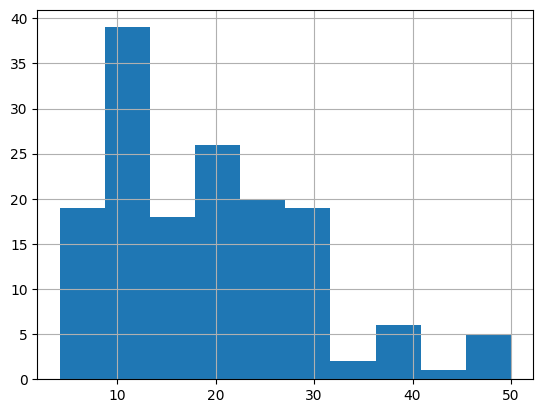

In [33]:
df['preciomillones'].hist();

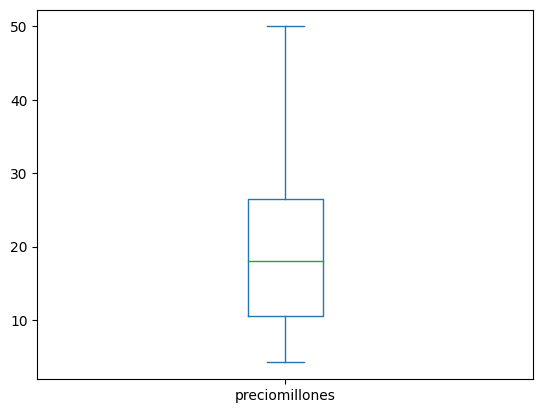

In [34]:
df['preciomillones'].plot(kind='box');

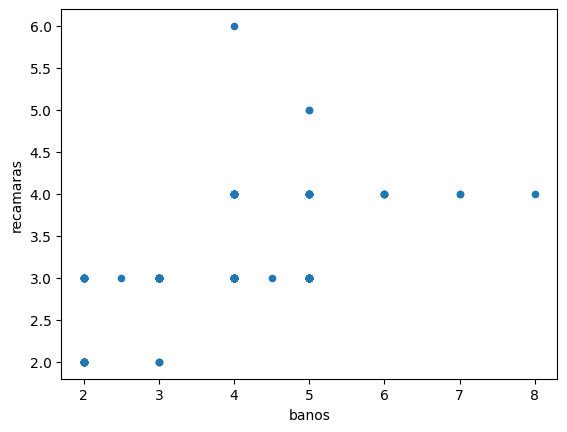

In [35]:
df.plot('banos', 'recamaras', kind='scatter');